In [1]:
from pyiron_workflow import Workflow

In [2]:
@Workflow.wrap.as_function_node("x", "y", "z")
def add_x_and_y(x, y):
    z = x + y
    return x, y, z

In [3]:
@Workflow.wrap.as_function_node()
def add_x_and_y_and_z(x, y, z):
    w = x + y + z
    return w

In [4]:
wf = Workflow("my_workflow")

In [5]:
wf.x = 1
wf.y = 2
wf.data = add_x_and_y(x=wf.x, y=wf.y)
wf.w = add_x_and_y_and_z(x=wf.data.outputs.x, y=wf.data.outputs.y, z=wf.data.outputs.z)

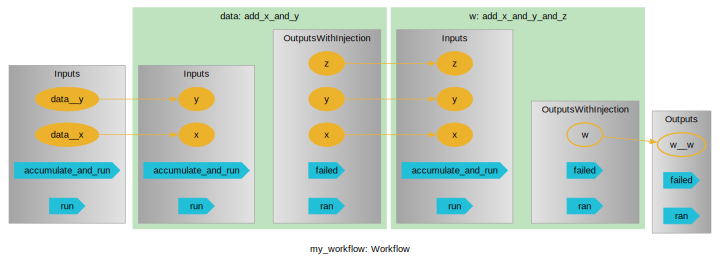

In [6]:
wf.draw(size=(10,10))

In [7]:
wf.run()

{'w__w': 6}

In [8]:
def get_linked_nodes(graph_dict):
    nodes_dict = {}
    node_mapping_dict = {}
    input_dict = {}
    for i, [k, v] in enumerate(wf.graph_as_dict["nodes"].items()):
        nodes_dict[i] = v.node_function
        node_mapping_dict[k] = i
        input_dict[k] = {
            con.full_label: con.value 
            for con in v.inputs.channel_dict.to_list() 
            if len(con.connections) == 0
        }
    return nodes_dict, node_mapping_dict, input_dict

In [9]:
def extend_nodes_dict(nodes_dict, input_dict):
    i = len(nodes_dict)
    nodes_links_dict = {}
    for val_dict in input_dict.values():
        for k, v in val_dict.items():
            if v not in nodes_dict.values():
                nodes_dict[i] = v
                nodes_links_dict[k] = i
                i += 1
            else:
                nodes_links_dict[k] = {tv:tk for tk, tv in nodes_dict.items()}[v]
    return nodes_links_dict

In [10]:
def get_edges(graph_dict, node_mapping_dict, nodes_links_dict):
    edges_lst = []
    for link in list(graph_dict["edges"]["data"].keys()):
        source_combo, target_combo = link
        target, target_handle = target_combo.split(".")
        source, source_handle = source_combo.split(".")
        edges_lst.append({'target': node_mapping_dict[target], 'targetHandle': target_handle, 'source': node_mapping_dict[source], 'sourceHandle': source_handle})

    for k, v in nodes_links_dict.items():
        target, target_handle = k.split(".")
        edges_lst.append({'target': node_mapping_dict[target], 'targetHandle': target_handle, 'source': v, 'sourceHandle': None})
    return edges_lst

In [11]:
nodes_dict, node_mapping_dict, input_dict = get_linked_nodes(graph_dict=wf.graph_as_dict)

In [12]:
nodes_links_dict = extend_nodes_dict(nodes_dict=nodes_dict, input_dict=input_dict)

In [13]:
edges_lst = get_edges(graph_dict=wf.graph_as_dict, node_mapping_dict=node_mapping_dict, nodes_links_dict=nodes_links_dict)
edges_lst

[{'target': 1, 'targetHandle': 'x', 'source': 0, 'sourceHandle': 'x'},
 {'target': 1, 'targetHandle': 'y', 'source': 0, 'sourceHandle': 'y'},
 {'target': 1, 'targetHandle': 'z', 'source': 0, 'sourceHandle': 'z'},
 {'target': 0, 'targetHandle': 'x', 'source': 2, 'sourceHandle': None},
 {'target': 0, 'targetHandle': 'y', 'source': 3, 'sourceHandle': None}]

In [14]:
nodes_dict

{0: <function __main__.add_x_and_y(x, y)>,
 1: <function __main__.add_x_and_y_and_z(x, y, z)>,
 2: 1,
 3: 2}